# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [3]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [4]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python',encoding='ISO-8859-1')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python',encoding='ISO-8859-1')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python',encoding='ISO-8859-1')


Let's take a look at the first 5 rows of each table:

In [5]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [9]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [10]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [11]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [12]:
ratings_by_title = data.groupby('title').size()

In [13]:
ratings_by_title[:5]

,0
title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199


Let's now grab the titles of movies that were rated more than 250 times:

In [14]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [15]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [16]:
mean_ratings = mean_ratings.loc[active_titles]

In [17]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [18]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [19]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [20]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [21]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [22]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [23]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [24]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [25]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


# Assignment 1 Starts Here

1. An aggregate of movie ratings by men of age above 25 for each particular genre,
e.g., Action, Adventure, Drama, Science Fiction, ... Note, Action|Drama|Thriller’ is not
considered a unique genre. The movie that has a genre like this belongs to all three
genres

In [26]:
male_above_25 = data[(data['gender'] == 'M') & (data['age'] > 25)]

Split the genres and create a new dataframe with separate rows for each genre

In [27]:
split_genres = male_above_25['genres'].str.split('|', expand=True).stack()
split_genres.index = split_genres.index.droplevel(-1)
split_genres.name = 'genres'

exploded = male_above_25.drop(columns='genres').join(split_genres)


In [28]:

result = exploded.groupby('genres')['rating'].agg(['count', 'mean']).reset_index()

print(result)

         genres   count      mean
0        Action   76448  3.554547
1     Adventure   39923  3.538637
2     Animation    9866  3.721569
3    Children's   17540  3.475314
4        Comedy   95836  3.565456
5         Crime   22545  3.764249
6   Documentary    2349  3.950192
7         Drama  107794  3.812309
8       Fantasy    9539  3.490408
9     Film-Noir    6838  4.117140
10       Horror   22303  3.241089
11      Musical   11973  3.700242
12      Mystery   12919  3.759347
13      Romance   39747  3.659748
14       Sci-Fi   49518  3.509693
15     Thriller   54883  3.644025
16          War   24391  3.940634
17      Western    8583  3.708494


2. The top 5 ranked movies by the most number of ratings (not the highest rating).

In [29]:
ratings_count = data.groupby(['movie_id','title'])['rating'].count().reset_index()

In [30]:
top_5_movies_with_most_ratings = ratings_count.nlargest(5,'rating')
print(top_5_movies_with_most_ratings)

      movie_id                                              title  rating
2651      2858                             American Beauty (1999)    3428
253        260          Star Wars: Episode IV - A New Hope (1977)    2991
1106      1196  Star Wars: Episode V - The Empire Strikes Back...    2990
1120      1210  Star Wars: Episode VI - Return of the Jedi (1983)    2883
466        480                               Jurassic Park (1993)    2672


3. Average movie ratings between users of different age groups (<18, 18-30, 30-50,
50-70, 70>)

First, define the age_bins and assign the age_bins to users

In [31]:
age_bins = [0, 17, 30, 50, 70, float('inf')]
age_labels = ['<18', '18-30', '30-50', '50-70', '70+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

Next, calculate the average movie rating for each age group

In [32]:
average_ratings_by_age_group = data.groupby('age_group')['rating'].mean().reset_index()
print(average_ratings_by_age_group)


  age_group    rating
0       <18  3.549520
1     18-30  3.533299
2     30-50  3.642516
3     50-70  3.766632
4       70+       NaN


<ipython-input-32-d1216e0d7a9e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ratings_by_age_group = data.groupby('age_group')['rating'].mean().reset_index()


4.Pick a movie of your choice and for all movies of the same year, provide a
breakdown of the number of unique movies rated by 3 ranges of age of reviewers (a)
under 18 (b) 19 to 45 (c) Above 45.

My choice of the movie is Sleepless in Seattle. First, we find out about the year of this movie by using a helper function extract_year to extract the year of the movie from the moive title

In [33]:
import re
def extract_year(title):
    pattern = r'\((\d{4})\)'
    match = re.search(pattern, title)
    if match:
        return int(match.group(1))
    else:
        return None

Apply the helper function to the 'title' column and create a new column 'movie_year'

In [34]:
data['movie_year'] = data['title'].apply(extract_year)

In [35]:
my_choice = "Sleepless in Seattle (1993)"
year_of_my_choice = data[data['title'] == my_choice]['movie_year'].values[0]
print(year_of_my_choice)


1993


Given the year of my movie choice, filter all movies from that year

In [36]:
movies_same_year = data[data['movie_year']==year_of_my_choice]

Create age ranges and count unique movies rated by age ranges

In [37]:
age_ranges = [(0,18),(19,45),(46,100)]
movies_same_year_count_by_age = {}
for i, age_range in enumerate(age_ranges):
    min_age, max_age = age_range
    age_filtered = movies_same_year[(movies_same_year['age'] >= min_age) & (movies_same_year['age'] <= max_age)]
    unique_movies = age_filtered['movie_id'].nunique()
    movies_same_year_count_by_age[f'Age Range {i + 1} ({min_age}-{max_age})'] = unique_movies

print(movies_same_year_count_by_age)

{'Age Range 1 (0-18)': 150, 'Age Range 2 (19-45)': 157, 'Age Range 3 (46-100)': 151}


5.A function that takes in a user_id and a movie_id, and returns a list of all
the other movies that the user rated similarly to the given movie, i.e. with the same
rating. Demonstrate that your function works.

This function will first find the user's rating for given movie_id. In all the user's given rating, find the ones that has the same rating in the previous step, and return a list of these movies' title

In [38]:
def find_similar_rated_movies(user_id, movie_id):
    user_movie_rating = data.loc[(data['user_id'] == user_id) & (data['movie_id'] == movie_id), 'rating'].values[0]
    similar_rated_movies = data.loc[(data['user_id'] == user_id) & (data['rating'] == user_movie_rating) & (data['movie_id'] != movie_id)]
    return similar_rated_movies['title'].tolist()

The example usage provided below demonstrates how the find_similar_rated_movies function returns a list of movie titles that the user has rated with the same rating as the given movie.

In [39]:
user_id = 1
movie_id = 1193
similar_movies = find_similar_rated_movies(user_id, movie_id)
user_movie_rating = data.loc[(data['user_id'] == user_id) & (data['movie_id'] == movie_id), 'rating'].values[0]
print(f"User {user_id} rated movie {movie_id} with a rating of {user_movie_rating}. They also rated the following movies with the same rating:")
for movie_title in similar_movies:
    movie_rating = data.loc[(data['user_id'] == user_id) & (data['title'] == movie_title), 'rating'].values[0]
    print(f"Movie: {movie_title} - Rating: {movie_rating}")

User 1 rated movie 1193 with a rating of 5. They also rated the following movies with the same rating:
Movie: Bug's Life, A (1998) - Rating: 5
Movie: Ben-Hur (1959) - Rating: 5
Movie: Christmas Story, A (1983) - Rating: 5
Movie: Beauty and the Beast (1991) - Rating: 5
Movie: Sound of Music, The (1965) - Rating: 5
Movie: Awakenings (1990) - Rating: 5
Movie: Back to the Future (1985) - Rating: 5
Movie: Schindler's List (1993) - Rating: 5
Movie: Pocahontas (1995) - Rating: 5
Movie: Last Days of Disco, The (1998) - Rating: 5
Movie: Cinderella (1950) - Rating: 5
Movie: Apollo 13 (1995) - Rating: 5
Movie: Toy Story (1995) - Rating: 5
Movie: Rain Man (1988) - Rating: 5
Movie: Mary Poppins (1964) - Rating: 5
Movie: Dumbo (1941) - Rating: 5
Movie: Saving Private Ryan (1998) - Rating: 5


6.Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived
from it.


In [40]:
%matplotlib inline

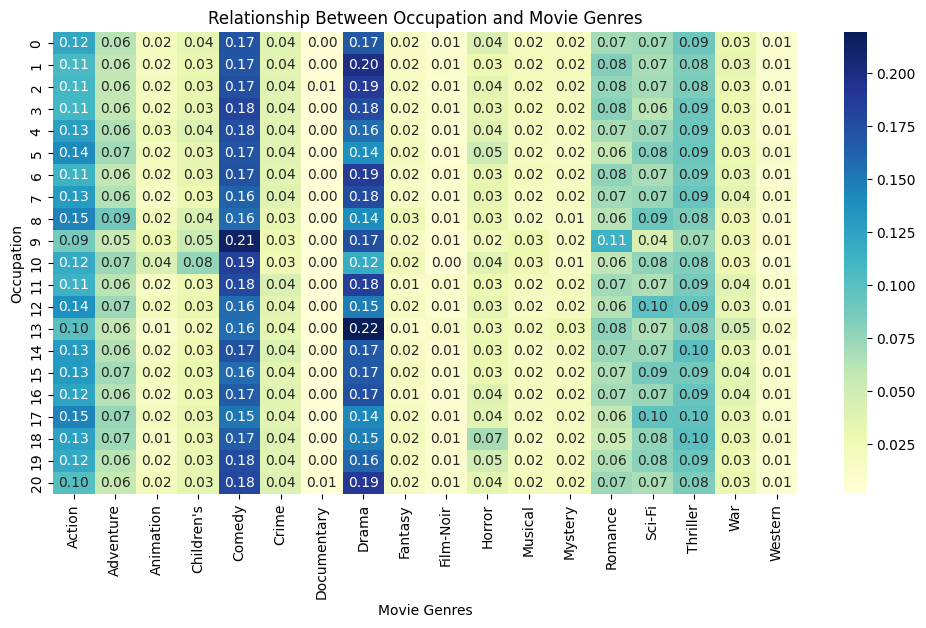

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
split_genres = data['genres'].str.split('|', expand=True).stack()
split_genres.index = split_genres.index.droplevel(-1)
split_genres.name = 'genres'

exploded = data.drop(columns='genres').join(split_genres)

# Group by occupation and genres, and count the number of ratings
occupation_genres = exploded.groupby(['occupation', 'genres']).agg({'rating': 'count'}).reset_index()

# Pivot the data to create a matrix with occupation as rows, genres as columns, and rating count as values
occupation_genres_pivot = occupation_genres.pivot_table(index='occupation', columns='genres', values='rating', fill_value=0)

# Normalize the data by dividing each value by the sum of the row values (to get the proportion of ratings for each genre within each occupation group)
occupation_genres_normalized = occupation_genres_pivot.div(occupation_genres_pivot.sum(axis=1), axis=0)

# Create a heatmap to visualize the relationship between occupation and movie genres
plt.figure(figsize=(12, 6))
sns.heatmap(occupation_genres_normalized, cmap='YlGnBu', annot=True, fmt='.2f')
plt.xlabel('Movie Genres')
plt.ylabel('Occupation')
plt.title('Relationship Between Occupation and Movie Genres')
plt.show()

Some of my observations include:
1. Drama and Comedy are popular across all  occupations.
2. Action, Adventure, and Thriller genres have a slightly higher preference among specific occupation groups.
3. Some genres have a more niche appeal,such as Documentary, Film-Noir and Western
4. Occupation may not be a strong determinant of movie preferences. ALthough there are some variations in genre preference across occupation groups, the differences are not very pronouced. This might indicate that other factors, such as age, gender and personal preference may have a stronger influence on the movie preferences